# Project 05 -- Emilio Pozas

**TA Help:** 
    
**Collaboration:** 

## Question 1

In [1]:
options(jupyter.rich_display = F)

In [2]:
options(repr.matrix.max.cols=30, repr.matrix.max.rows=200)

In [3]:
 myDF <- read.csv("/anvil/projects/tdm/data/election/escaped2020sample.txt", sep="|")

In [4]:
head(myDF)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
1 C00401224 N         YE                     2.020013e+17 24T           
2 C00401224 N         M4     P               2.020042e+17 24T           
3 C00193433 N         YE     P               2.020012e+17 15            
4 C00401224 N         YE                     2.020013e+17 24T           
5 C00401224 N         MY                     2.019073e+17 24T           
6 C00618371 N         Q3     P               2.019102e+17 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY    KISSIMMEE    FL    34744    HOMEMAKER   

In [5]:
library(lubridate, warn.conflicts = FALSE)

In [6]:
myDF$newdates <-mdy(myDF$TRANSACTION_DT)

In [7]:
head(myDF$newdates)

[1] "2019-07-11" "2020-03-04" "2019-12-18" "2019-08-30" "2019-03-21"
[6] "2019-07-11"

In [8]:
myDF$TRANSACTION_YR <- year(myDF$newdates)

In [9]:
head(myDF$TRANSACTION_YR)

[1] 2019 2020 2019 2019 2019 2019

In [10]:
table_sum_AMT <- tapply(myDF$TRANSACTION_AMT, myDF$TRANSACTION_YR,sum)

In [11]:
tapply_df <- data.frame(YEAR = as.numeric(names(table_sum_AMT)), TOTAL_AMOUNT = table_sum_AMT)

In [12]:
table(myDF$TRANSACTION_YR)


   2002    2010    2015    2016    2017    2018    2019    2020 
      1       1       3       2       3     369 3160207 1518175 

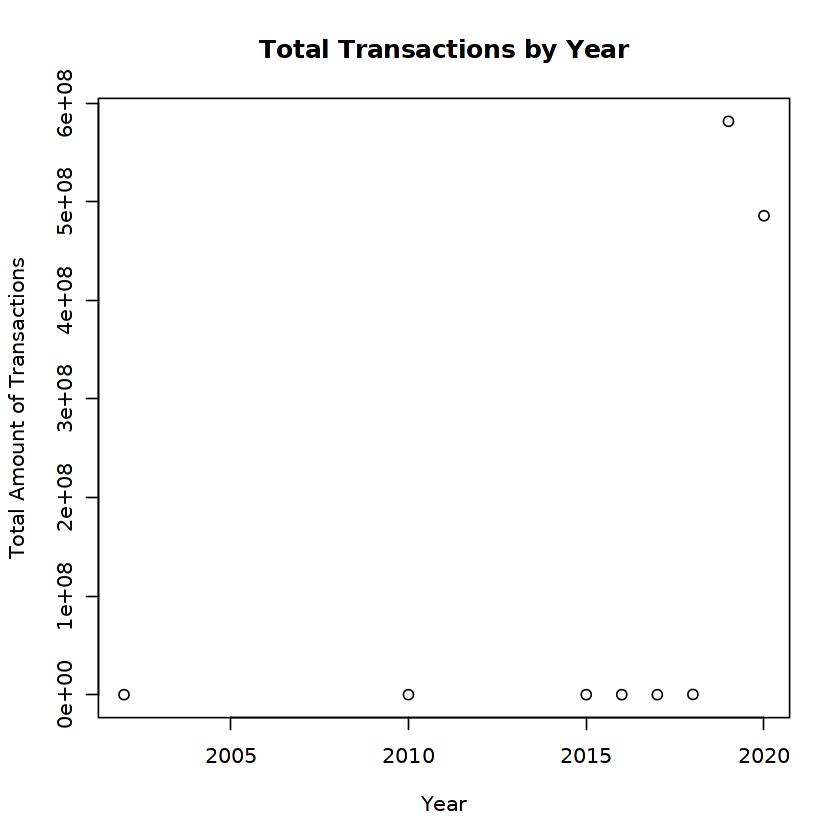

In [13]:
plot(tapply_df$YEAR, tapply_df$TOTAL_AMOUNT, xlab = "Year", ylab = "Total Amount of Transactions", main = "Total Transactions by Year")

## Question 2

In [14]:
my2020DF <- subset(myDF, TRANSACTION_YR == "2020")

In [15]:
my2020DF$TRANSACTION_MONT <- month(my2020DF$newdates)

In [16]:
my2020_sum <- tapply(my2020DF$TRANSACTION_AMT, my2020DF$TRANSACTION_MONT, sum)

In [17]:
my2020_sumDF <- data.frame(MONTH = as.numeric(names(my2020_sum)), TOTAL_AMOUNT = my2020_sum)

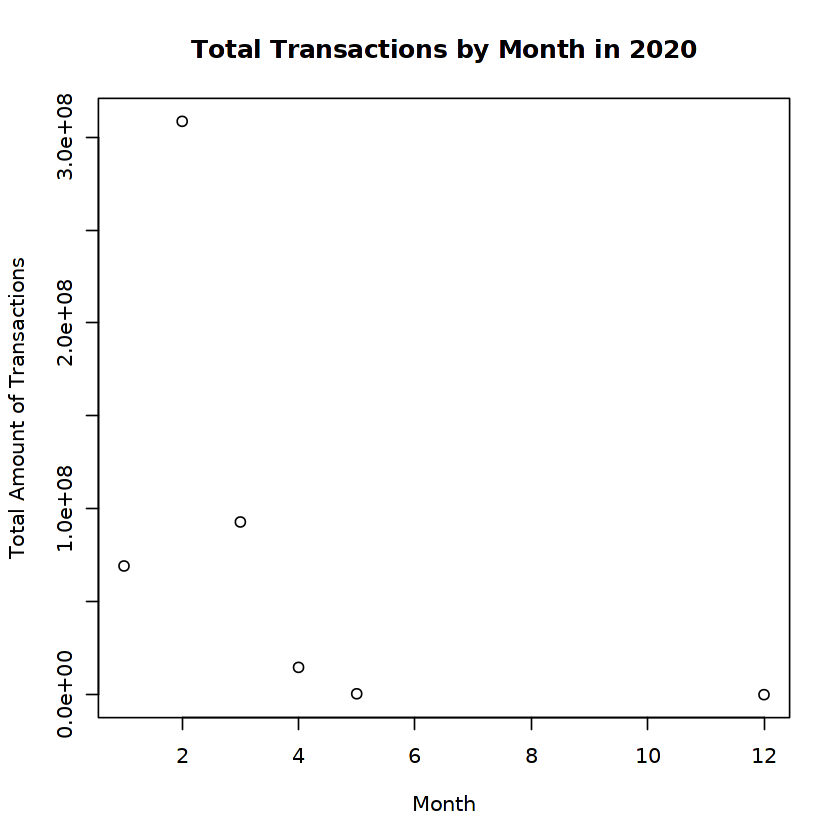

In [18]:
plot(my2020_sumDF$MONTH, my2020_sumDF$TOTAL_AMOUNT, xlab = "Month", ylab = "Total Amount of Transactions", main = "Total Transactions by Month in 2020")

## Question 3

In [19]:
namestapply <- tapply(myDF$TRANSACTION_AMT, myDF$NAME, sum)

In [20]:
head(sort(namestapply, decreasing =TRUE))

                       BLOOMBERG, MICHAEL R. 
                                   275751211 
                                 STEYER, TOM 
                                    24796081 
   EVERYTOWN FOR GUN SAFETY ACTION FUND, INC 
                                    10005656 
                                  YASS, JEFF 
                                     6047000 
UNITED BROTHERHOOD OF CARPENTERS AND JOINERS 
                                     3936291 
            REPUBLICAN GOVERNORS ASSOCIATION 
                                     3300000 

In [23]:
statestapply <- tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)

In [25]:
head(sort(statestapply, decreasing = TRUE))

       NY        CA        TX        FL        DC        MA 
364883860 151842431  63719103  44118779  37280905  32308431 

In [26]:
zipcodetapply <- tapply(myDF$TRANSACTION_AMT, myDF$ZIP_CODE, sum)

In [32]:
tail(sort(zipcodetapply), n =10 )

200361806 101543302     78209     20006 200012133 190041188 101634184 941040626 
  2500100   2603700   3357597   3763519   3972934   5014000  10005656  24794281 
101501101 101501060 
 64868135 210077476 

A. Bloomberg, Michael R.

B. NY, CA, TX, FL, DC, MA

C.101501060, 101501101, 941040626, 101634184, 190041188, 200012133, 20006, 78209, 101543302, 200361806

## Question 4

In [37]:
top_5_states <- head(sort(statestapply, decreasing = TRUE)) 

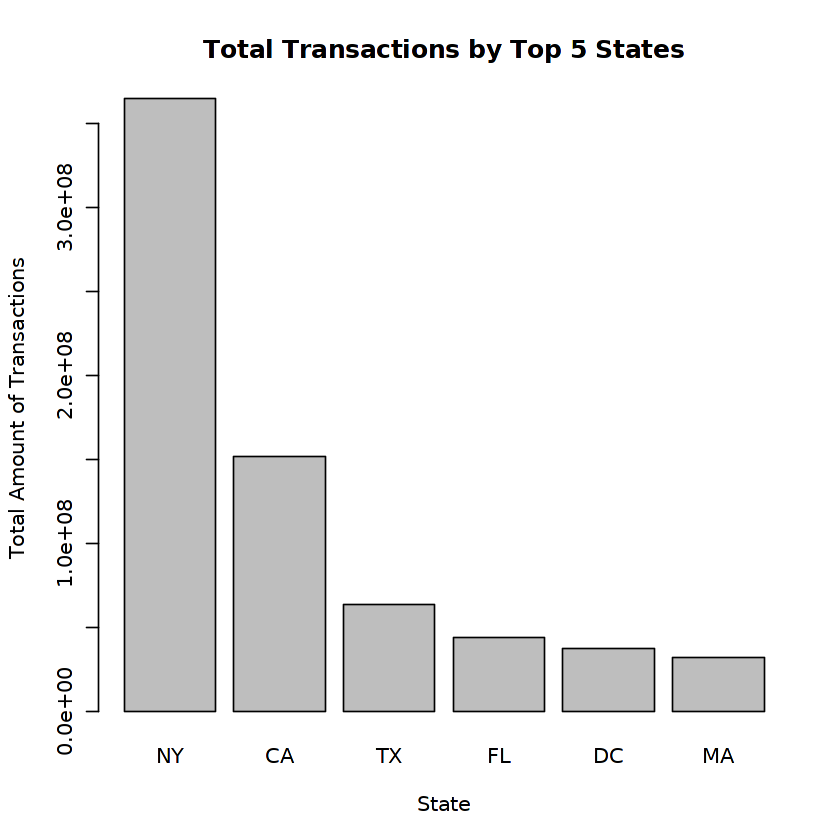

In [39]:
barplot(top_5_states, xlab = "State", ylab = "Total Amount of Transactions", main = "Total Transactions by Top 5 States",
        names.arg = names(top_5_states))

In [40]:
top_10_states <- tail(sort(zipcodetapply), n =10 )

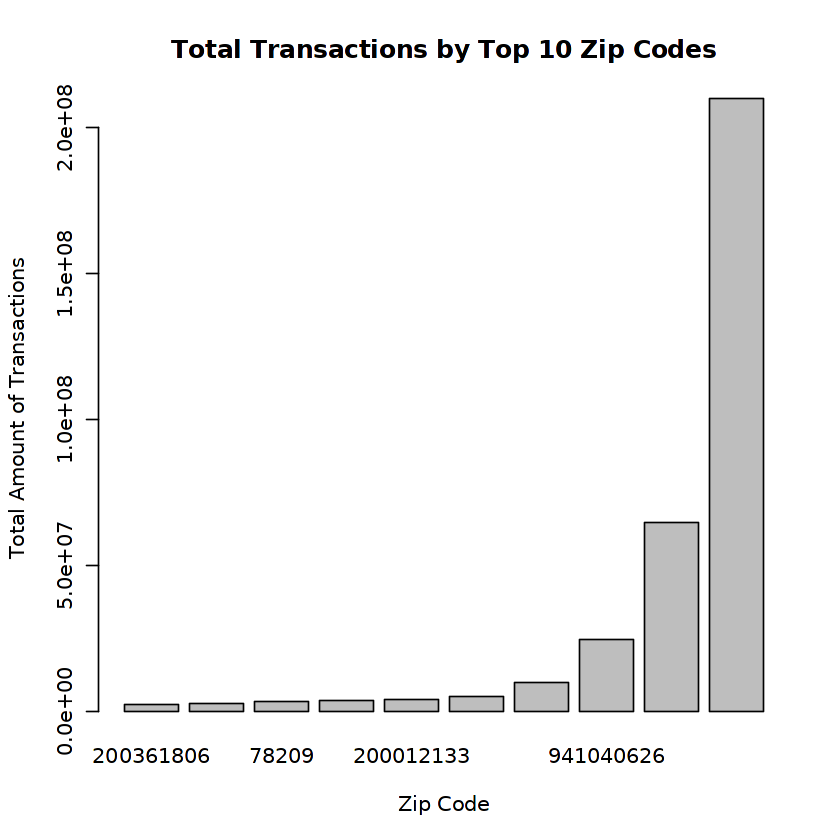

In [41]:
barplot(top_10_states, xlab = "Zip Code", ylab = "Total Amount of Transactions", main = "Total Transactions by Top 10 Zip Codes",
        names.arg = names(top_10_states))

## Question 5

In [44]:
head(table(myDF$OCCUPATION))


                             "COMPUTER TUTOR" TO FAMILIES 
                      132613                            2 
               "NOT EMPLOYED               "NOT EMPLOYED" 
                           1                            7 
               $ELF EMPLOYED               %%OCCUPATION%% 
                           4                           49 

In [45]:
tail(table(myDF$OCCUPATION))


               {PROFESSOR                  {RFESSPR                 {ROFESSOR 
                        2                        14                         1 
   {{OCCUPATION,DEFAULTTO {{OCCUPATION,DEFAULTTO=}}                   ~~BLANK 
                        4                         5                         1 

In [46]:
occupation_sum <- tapply(myDF$TRANSACTION_AMT, myDF$OCCUPATION, sum)

In [49]:
head(sort(occupation_sum), n= 10)

                       VENTURE MANAGER                 VENTURE PHILANTHROPIST 
                                -33171                                 -15000 
  ARMED CUSTOM PROTECTION FLEX OFFICER                  SVP NATIONAL ACCOUNTS 
                                 -9865                                  -5600 
                   SEPTEMBER GROUP LLC                         COAL EXECUTIVE 
                                 -5400                                  -5000 
            CHIEF COUNSEL - LITIGATION CEO AND CHAIRMAN OF BOARD OF DIRECTORS 
                                 -4527                                  -4400 
                   CHAIRMAN AND C.E.O. PHYSICIAN (PEDIATRICS AND ADOLESCENT M 
                                 -4400                                  -2890 

In [50]:
tail(sort(occupation_sum), n= 10)

             HOMEMAKER              EXECUTIVE              PRESIDENT 
              14058507               15546942               20209278 
PRESIDENTIAL CANDIDATE                    CEO               ATTORNEY 
              24824136               25055647               31326953 
                                 NOT EMPLOYED                RETIRED 
              77364020               84855951               98774206 
               FOUNDER 
             279442327 

In [54]:
top10_occupations <- tail(sort(occupation_sum), n= 5)

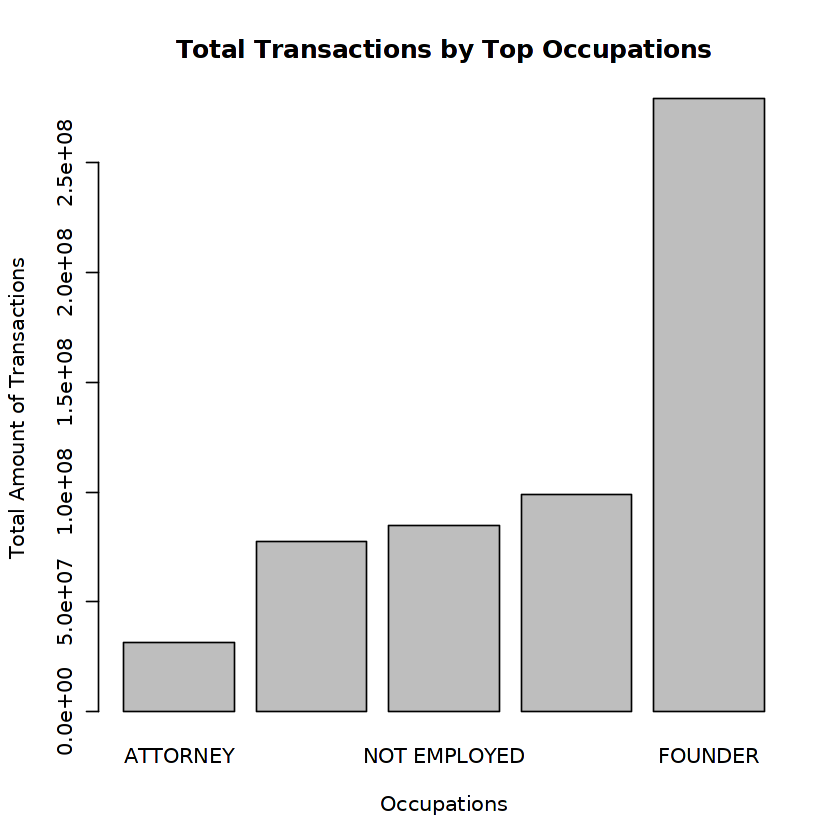

In [55]:
barplot(top10_occupations, xlab = "Occupations", ylab = "Total Amount of Transactions", main = "Total Transactions by Top Occupations",
        names.arg = names(top10_occupations))

It was intresting to see the jobs that give the most money to the elections. It would also be good to note that the data does not seem to be well documented when it comes to occupations as it has many errors in the manner in which the words were written and more. 

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.